In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### DATA CLEANING

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [10]:
df['DOB'][0]

Timestamp('1990-02-19 00:00:00')

In [11]:
df['DOJ'][0]

Timestamp('2012-06-01 00:00:00')

In [12]:
df['DOL'][0]

'present'

In [13]:
df['DOB']=pd.to_datetime(df['DOB']).dt.date
df["DOJ"]=pd.to_datetime(df["DOJ"]).dt.date
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

In [14]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2023-04-19,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2023-04-19,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2023-04-19,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2023-04-19,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
df[df['Designation']=='get']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
332,597966,180000,2013-08-01,2014-03-01,get,-1,m,1990-08-02,91.80,cbse,2008,82.70,cbse,47,1,B.Tech/B.E.,mechanical and automation,75.39,47,1,Delhi,2013,580,640,720,0.971663,-1,-1,-1,553,-1,-1,-1,-0.1590,0.8784,0.3174,0.27270,0.4805
350,38162,340000,2010-07-01,2011-05-01,get,Faridabad,m,1988-08-13,67.67,up board,2004,73.80,up board,11157,1,B.Tech/B.E.,electrical engineering,87.70,11157,0,Jharkhand,2010,455,615,725,0.910770,455,433,-1,-1,-1,-1,-1,-1.9629,-1.0593,-0.7794,-0.17270,-0.1295
1717,330551,145000,2012-10-01,2013-01-01,get,Hyderabad,m,1991-07-29,80.00,ssc,2008,90.60,intermidiate,8818,2,B.Tech/B.E.,mechanical engineering,61.00,8818,1,Telangana,2012,345,495,575,0.184772,-1,-1,-1,306,-1,-1,-1,1.5533,1.7488,1.6880,-1.14220,0.1864
1897,1064862,175000,2014-05-01,2023-04-19,get,Hyderabad,m,1991-02-04,87.00,state board,2009,79.90,state board,6345,2,B.Tech/B.E.,mechanical engineering,66.67,6345,0,Andhra Pradesh,2013,350,445,295,0.328746,-1,-1,-1,346,-1,-1,-1,1.5644,-1.1196,0.4711,1.16010,0.4805
2140,796296,600000,2014-06-01,2023-04-19,get,Indore,m,1992-01-05,91.20,cbse,2010,90.00,cbse,222,2,B.Tech/B.E.,mechanical engineering,78.00,222,0,Jharkhand,2014,720,655,680,0.654107,445,-1,-1,420,-1,-1,-1,-1.4517,0.0459,-1.6807,0.90660,0.0973
2318,1094242,220000,2014-07-01,2023-04-19,get,Lucknow,m,1992-02-06,80.20,cbse,2009,64.20,cbse,13092,2,B.Tech/B.E.,electronics and electrical engineering,71.00,13092,0,Uttar Pradesh,2014,500,505,645,0.966007,-1,548,-1,-1,580,-1,-1,1.4208,1.0449,-0.4511,0.01920,0.6721
2443,1259589,110000,2014-10-01,2015-04-01,get,kharagpur,m,1993-03-18,80.00,icse,2010,76.00,icse,11210,2,B.Tech/B.E.,mechanical engineering,80.60,11210,0,Chhattisgarh,2014,735,555,535,0.328746,-1,-1,-1,346,-1,-1,-1,-0.4463,-0.9531,0.1637,0.01920,-2.0105
2666,110817,200000,2010-03-01,2011-03-01,get,Hyderabad,m,1989-05-15,80.00,ssc,2007,74.53,sbtet,964,2,B.Tech/B.E.,electronics and electrical engineering,68.00,964,1,Telangana,2010,385,345,425,0.229482,275,266,-1,-1,-1,-1,-1,-0.4173,0.3448,0.3817,-0.64280,0.9763
2757,1083682,350000,2015-01-01,2023-04-19,get,Nashik,m,1994-01-17,90.60,cbse,2011,74.40,cbse,12374,2,B.Tech/B.E.,mechanical engineering,73.00,12374,0,Punjab,2015,640,565,715,0.903941,395,-1,-1,500,-1,-1,-1,0.1282,0.2124,-1.2196,-0.99500,-0.2859


In [16]:
#we get jobs based on our specialization so by apply mode on specific branch we can replace 'get' value with most frequent designation
me_mode=df[df['Specialization']=='mechanical engineering']['Designation'].mode()[0]
ma_mode=df[df['Specialization']=='mechanical and automation']['Designation'].mode()[1]
eee_mode=df[df['Specialization']=='electronics and electrical engineering']['Designation'].mode()[0]

In [17]:
ece_mode=df[df['Specialization']=='electronics and communication engineering']['Designation'].mode()[0]
ee_mode=df[df['Specialization']=='electrical engineering']['Designation'].mode()[0]

In [18]:
me_mode,ma_mode,eee_mode,ece_mode,ee_mode

('assistant manager',
 'manager',
 'system engineer',
 'software engineer',
 'electrical engineer')

In [19]:
for i in range(0,len(df)):

    if df['Specialization'][i]=='mechanical engineering':
        if df['Designation'][i]=='get':
            df['Designation'][i]=me_mode
    
    elif df['Specialization'][i]=='mechanical and automation':
        if df['Designation'][i]=='get':
            df['Designation'][i]=ma_mode
 
    elif df['Specialization'][i]=='electronics and electrical engineering':
        if df['Designation'][i]=='get':
            df['Designation'][i]=eee_mode
    
    elif df['Specialization'][i]=='electronics and communication engineering':
        if df['Designation'][i]=='get':
            df['Designation'][i]=ece_mode
    
    elif df['Specialization'][i]=='electrical engineering':
        if df['Designation'][i]=='get':
            df['Designation'][i]=ee_mode      

In [20]:
df[df['Designation']=='get']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [21]:
df.to_csv('original_df.csv')

In [22]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [23]:
cs_replacement_list=['computer engineering','information technology','computer science & engineering','computer application',
                    'information science engineering','computer science and technology','computer science','computer networking',
                    'information science', 'computer and communication engineering',]

ec_replacement_list=['electronics and communication engineering','electronics and electrical engineering',
                     'electronics and computer engineering','applied electronics and instrumentation','embedded systems technology',
                    'electronics and instrumentation engineering','control and instrumentation engineering',
                    'instrumentation engineering','telecommunication engineering','electronics & telecommunications','instrumentation and control engineering',
                    'electronics & instrumentation eng','electronics','electronics engineering']

me_replacement_list=['mechanical engineering','mechanical and automation','internal combustion engine','automobile/automotive engineering','mechatronics','aeronautical engineering',
                    'mechanical & production engineering']

el_replacement_list=['electrical engineering','electrical and power engineering','power systems and automation']

ce_replacement_list=['civil engineering']

other_replacement_list=['metallurgical engineering','ceramic engineering','other',
                           'chemical engineering','biotechnology', 'industrial & production engineering','biomedical engineering',
                       'industrial engineering','polymer technology','industrial & management engineering','information & communication technology']          

In [24]:
for i in cs_replacement_list:
    df['Specialization'].replace(i,'CS',inplace=True)

for i in ec_replacement_list:
    df['Specialization'].replace(i,'EC',inplace=True)
    
for i in me_replacement_list:
    df['Specialization'].replace(i,'ME',inplace=True)
    
for i in el_replacement_list:
    df['Specialization'].replace(i,'EL',inplace=True)
    
for i in ce_replacement_list:
    df['Specialization'].replace(i,'CE',inplace=True)
    
for i in other_replacement_list:
    df['Specialization'].replace(i,'OTHER',inplace=True)

In [25]:
df['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'OTHER'], dtype=object)

### EDA

<AxesSubplot:xlabel='Salary', ylabel='Density'>

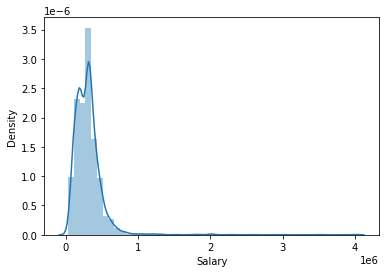

In [26]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

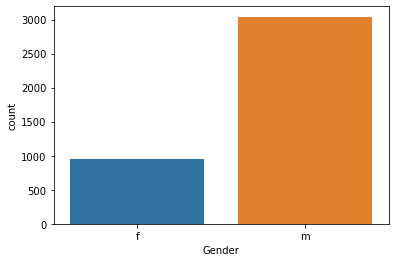

In [27]:
sns.countplot(df['Gender'])

 observation: most of the employees are men 

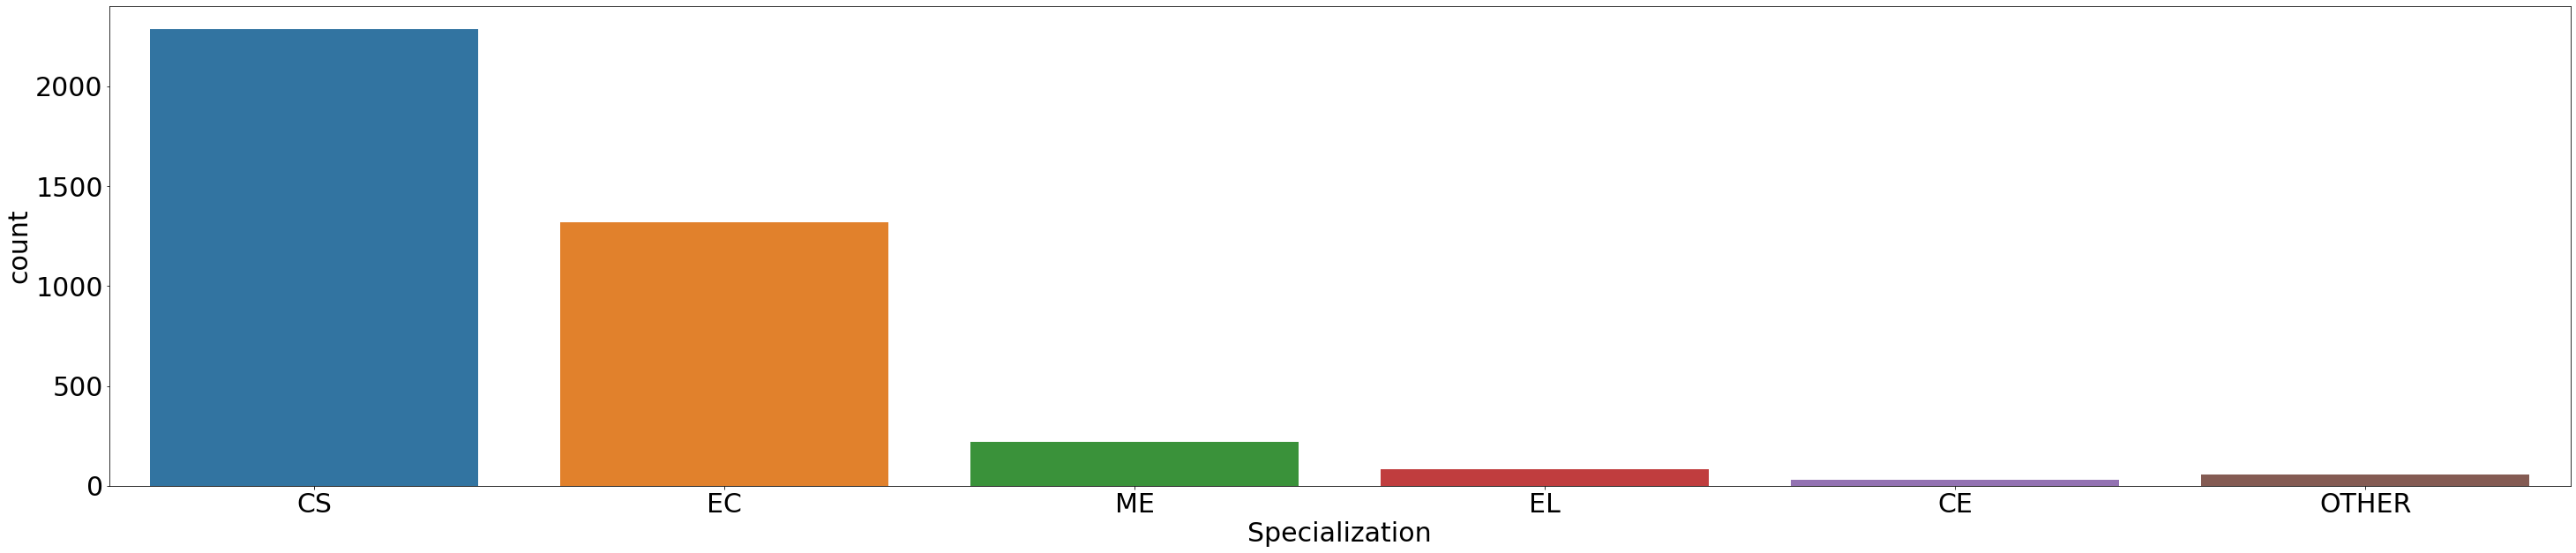

In [28]:
plt.figure(figsize=(50,10))
sns.countplot(df['Specialization'])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Specialization',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.show()

observation: most of the employees done electronics and communication engineering specialization in their graduation

<AxesSubplot:xlabel='10percentage'>

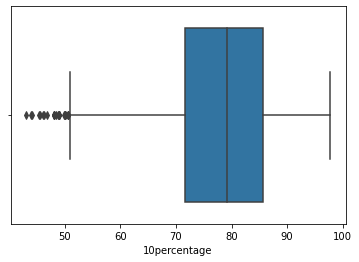

In [29]:
sns.boxplot(df['10percentage'])

obserrvation: the average percentage of 10th class is 79%

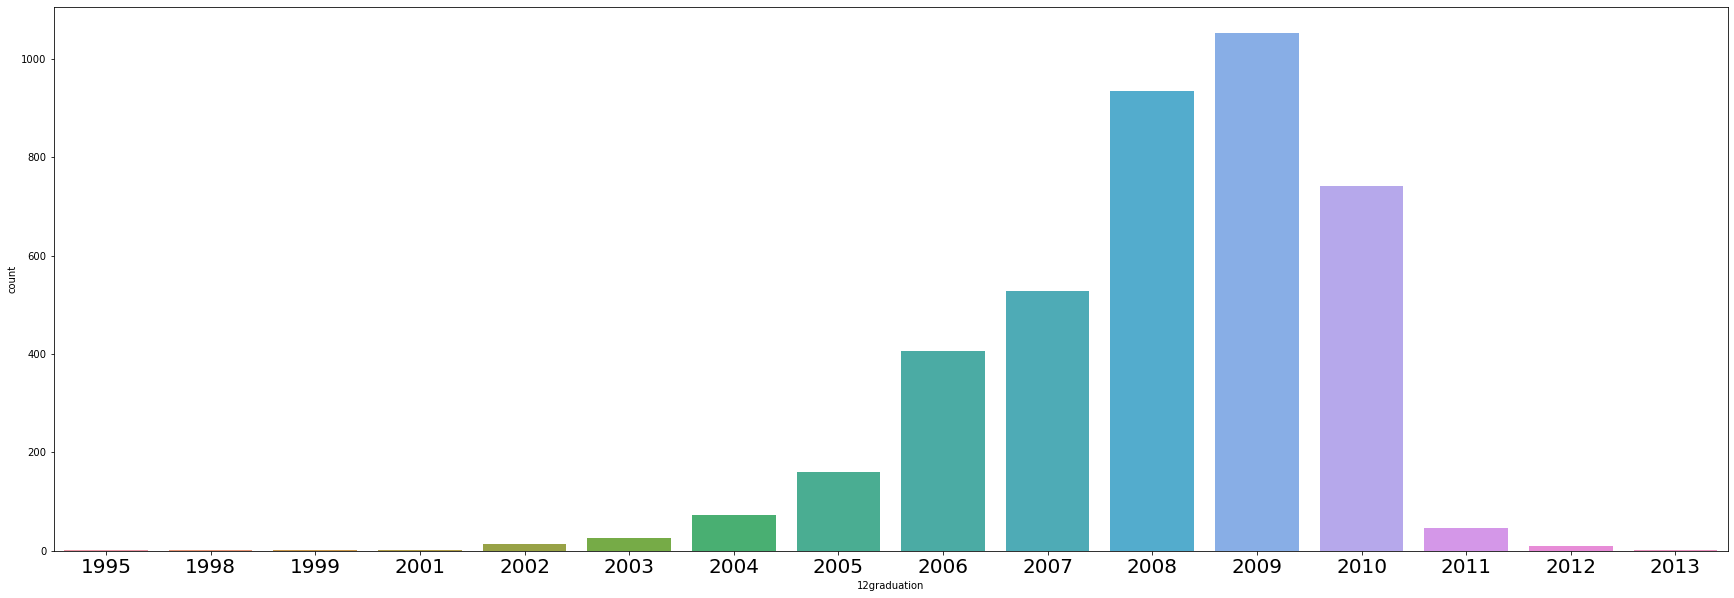

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(df['12graduation'])
plt.xticks(fontsize=20)
plt.show()

observation: most of the people completed their 12th standard in 2008 and 2009

<AxesSubplot:xlabel='collegeGPA'>

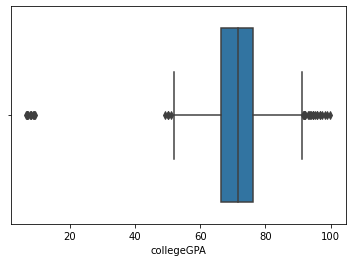

In [31]:
sns.boxplot(df['collegeGPA'])

observation: the average score of people in their college is around 71 

<AxesSubplot:xlabel='Degree', ylabel='count'>

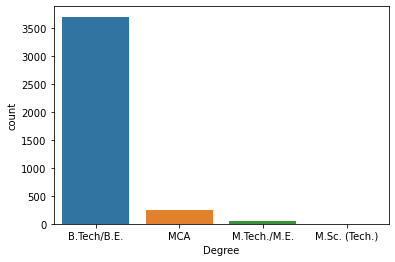

In [32]:
sns.countplot(df['Degree'])

observation: most of the employees persued B.Tech/B.E

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

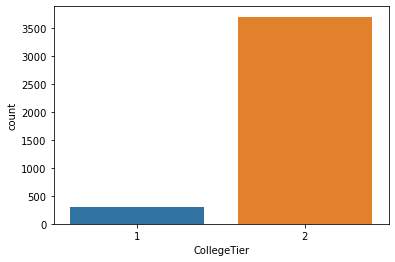

In [33]:
sns.countplot(df['CollegeTier'])

observation: most of the people are from tier-2 colleges

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

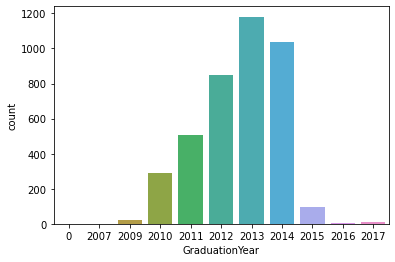

In [34]:
sns.countplot(df['GraduationYear'])

observation: most of the people are graduated in 2013 and 2014

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

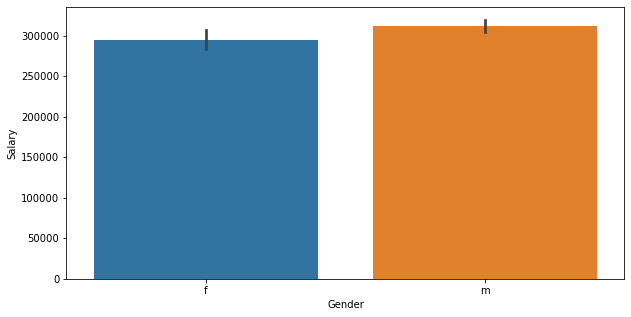

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='Salary',data=df)

observation: Female employees earn less than male employees in terms of overall pay.

In [36]:
df.groupby(['Gender'], as_index=False).agg({'Salary':['min','max']})

Gender Salary         
            min      max
0      f  35000  3500000
1      m  35000  4000000

In [37]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

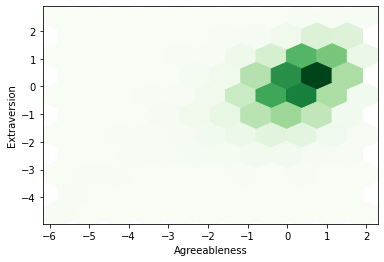

In [38]:
plt.hexbin(df['agreeableness'], df['extraversion'],gridsize=10,cmap='Greens')
plt.xlabel('Agreeableness')
plt.ylabel('Extraversion')
plt.show()

extroversion is a the personality trait, which refers to a state of being where someone draws energy from being with other people.
Agreeableness is a personality trait manifesting itself in individual behavioral characteristics

Observation: the two variables have a linear relation between them.

<AxesSubplot:xlabel='openess_to_experience', ylabel='nueroticism'>

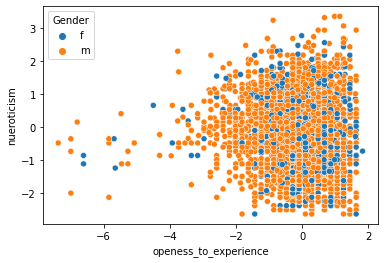

In [39]:
sns.scatterplot( df['openess_to_experience'],df['nueroticism'],hue=df['Gender'])

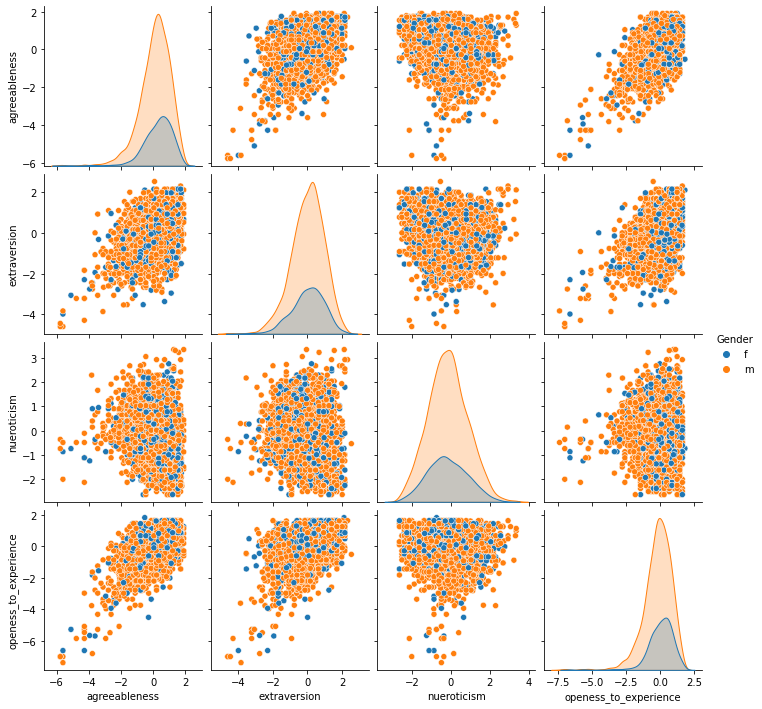

In [40]:
sns.pairplot(df, vars=['agreeableness', 'extraversion', 'nueroticism','openess_to_experience'], diag_kind="kde",hue='Gender')

observation: this pair plot shows the relation between each personality trait with respect to Gender

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

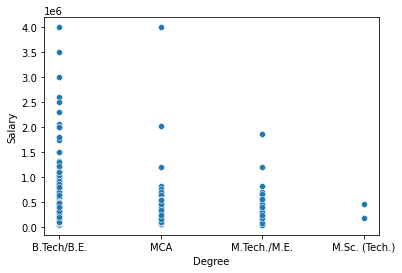

In [41]:
sns.scatterplot(df['Degree'], df['Salary'])

observation: Most of the highly paid employees has a B.Tech or a MCA degree.

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

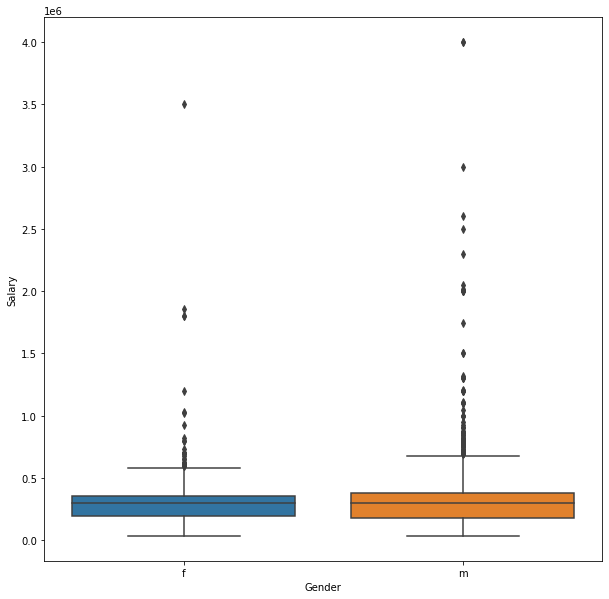

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Gender',y='Salary',data=df)

observation: the average salary of male and female are similar but the male employee earns highest salary when compared with female

Text(0.5, 0.98, 'Salary levels by specialization')

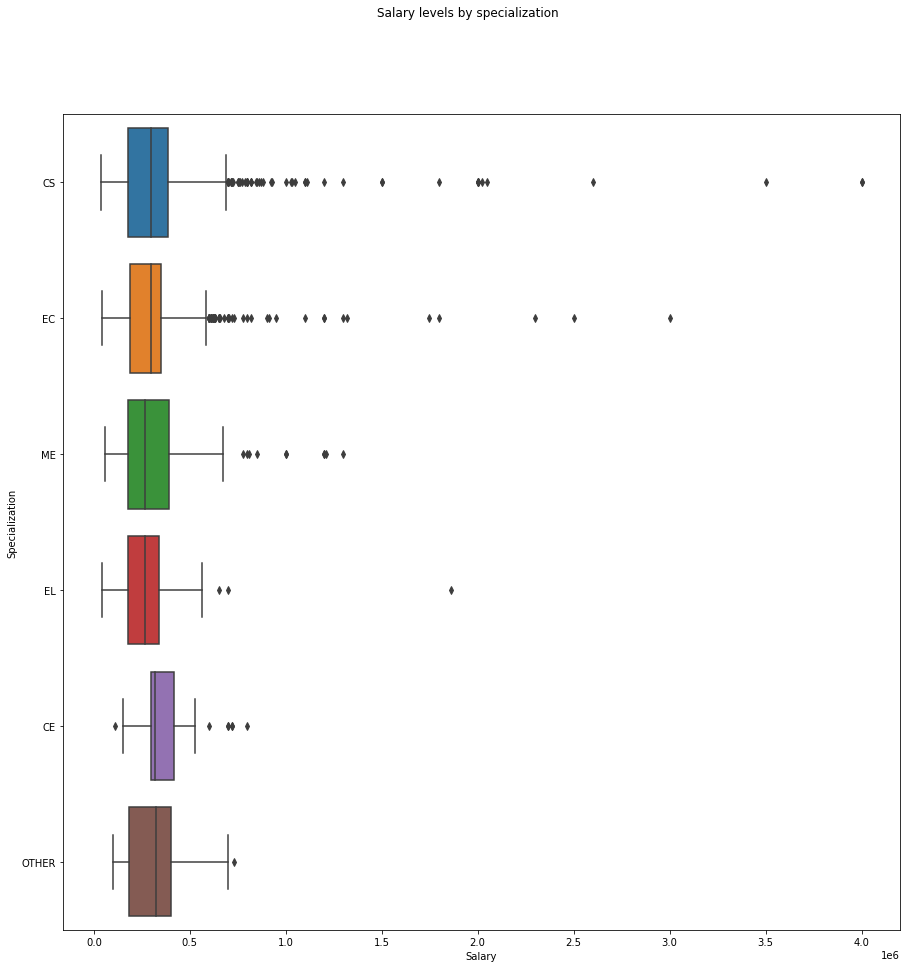

In [43]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary levels by specialization')

observation: When compared to others, those with a specialization in Computer science earn greater money.

In [44]:
top_Designation = df['Designation'].value_counts()[:10].index.tolist()
print(top_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer']


In [45]:
t10_Designations = df[df['Designation'].isin(top_Designation)]

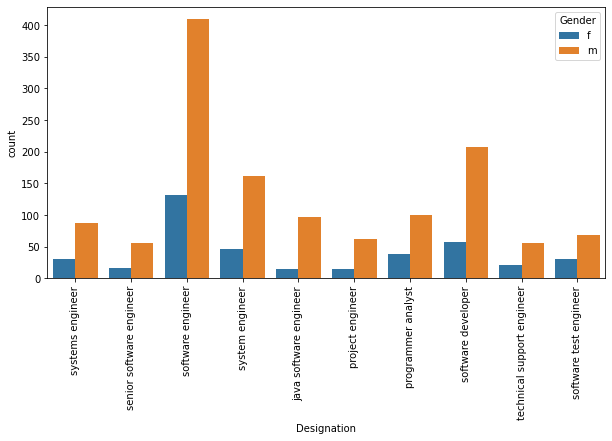

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Designation',hue='Gender',data=t10_Designations)
plt.xticks(fontsize=10,rotation=90)
plt.show()

observation: most of the male and female employees work as software engineer and software developer

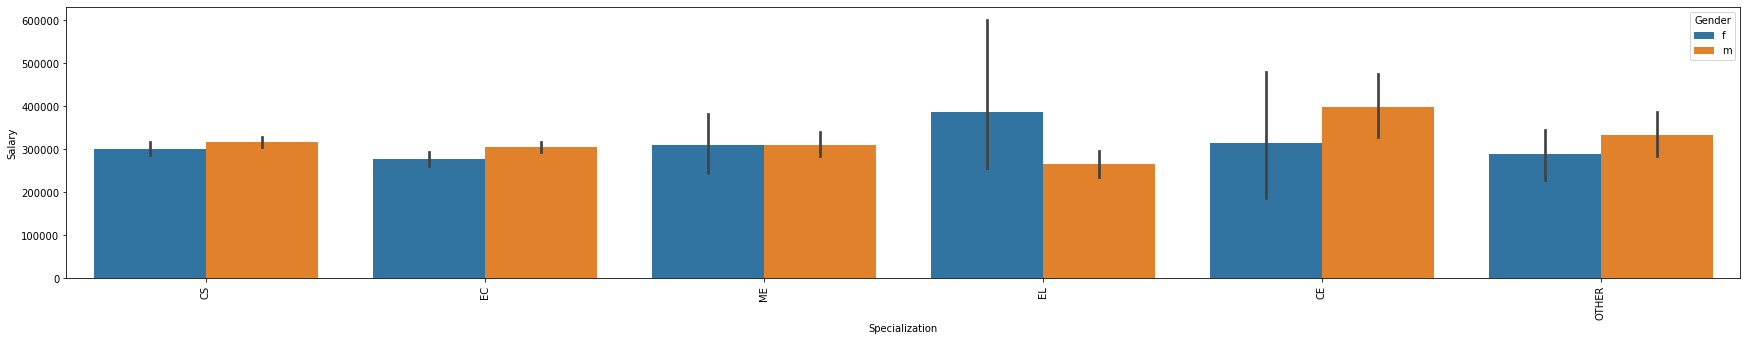

In [47]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,x='Specialization',y='Salary',hue='Gender')
plt.xticks(fontsize=10,rotation=90)
plt.show()

observation: salary of female employees is lower when compared with male employees

### Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.


        

In [48]:
dataframe=pd.read_csv('original_df.csv')
dataframe=dataframe.drop('Unnamed: 0',axis=1)

In [49]:
df2=dataframe[dataframe['Specialization']=='computer science & engineering']

In [50]:
roles=['programmer analyst','software engineer','hardware engineer','associate engineer']
data_frame=df2[df2['Designation'].isin(roles)]

In [51]:
data_frame['Experience'] = pd.to_datetime(data_frame["DOL"]).dt.year - pd.to_datetime(data_frame['DOJ']).dt.year

In [52]:
data_frame.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [53]:
fresher_df=data_frame[data_frame['Experience']==0]

In [54]:
fresher_df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
2000,1230280,315000,2015-03-01,2015-04-01,software engineer,Bangalore,m,1992-06-21,86.8,cbse,2009,63.6,state board,2285,2,B.Tech/B.E.,computer science & engineering,85.2,2285,0,West Bengal,2014,570,495,740,0.996744,635,-1,623,-1,-1,-1,-1,0.2718,0.7119,-1.2196,1.1601,0.2889,0
2092,1082552,200000,2015-02-01,2015-04-01,software engineer,Pune,f,1993-12-13,81.0,cbse,2010,75.5,cbse,6814,2,B.Tech/B.E.,computer science & engineering,82.8,6814,0,West Bengal,2014,475,410,320,0.622643,455,-1,407,-1,-1,-1,-1,0.2718,0.2124,0.0100,1.0333,0.4805,0
2298,425527,180000,2013-01-01,2013-09-01,software engineer,Noida,m,1989-04-14,82.0,cbse,2007,76.0,cbse,13543,2,B.Tech/B.E.,computer science & engineering,77.0,13543,0,Uttar Pradesh,2012,435,465,515,0.735796,475,-1,-1,-1,-1,-1,-1,1.9011,1.9048,-0.7794,-1.5828,-0.2875,0
2728,1063653,110000,2014-01-01,2014-04-01,software engineer,Gurgaon,m,1991-11-14,74.0,cbse,2009,63.0,cbse,14278,2,B.Tech/B.E.,computer science & engineering,72.0,14278,0,Haryana,2013,490,530,370,0.040999,405,-1,223,-1,-1,-1,-1,-1.5953,0.5454,-0.7585,0.5262,-0.6692,0
2968,902841,430000,2014-05-01,2014-08-01,software engineer,Hyderabad,m,1992-05-19,83.0,state board,2010,82.0,state board,9775,2,B.Tech/B.E.,computer science & engineering,71.0,9775,1,Telangana,2014,425,465,470,-1.000000,-1,-1,-1,-1,-1,-1,-1,-0.7335,-0.4536,0.1637,1.0333,-0.2859,0
3091,1127268,300000,2014-05-01,2014-10-01,software engineer,chennai,m,1991-01-12,68.0,cbse,2009,72.0,cbse,6659,2,B.Tech/B.E.,computer science & engineering,70.0,6659,1,Tamil Nadu,2013,440,425,415,0.622643,455,-1,407,-1,-1,-1,-1,-0.5899,-0.6201,0.1637,0.1459,-0.6692,0
3698,924712,240000,2014-05-01,2014-07-01,software engineer,Bangalore,m,1993-03-15,68.2,cbse,2010,55.0,cbse,124,2,B.Tech/B.E.,computer science & engineering,67.0,124,0,Orissa,2014,570,425,470,0.356536,525,-1,346,-1,-1,-1,-1,1.1336,0.5454,2.0080,0.3995,0.0973,0


In [55]:
avg=fresher_df['Salary'].mean()

In [56]:
if avg >= 250000 and avg <= 300000:
    print("you can earn up to 2.5-3 lakhs as a fresh graduate..")
else:
    print("you CANNOT earn up to 2.5-3 lakhs as a fresh graduate.")

you can earn up to 2.5-3 lakhs as a fresh graduate..


### Research Question

- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

        -Null Hypothesis: Gender does not impact specialization
        -Alternate Hypothesis : Gender impacts specialization

<AxesSubplot:xlabel='Specialization', ylabel='count'>

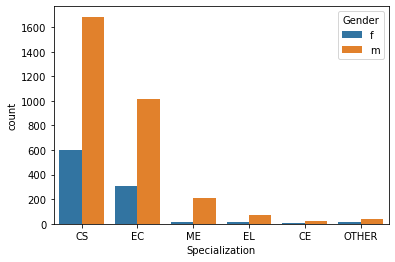

In [57]:
sns.countplot(x='Specialization',hue='Gender',data=df)

observation: here most of the women take computer science and electronics and communication for their specialization 

In [58]:
from scipy.stats import chi2_contingency as cst
columns = pd.crosstab(df['Gender'],df['Specialization'],margins=True)
chi2, p_value, dof, expected = cst(columns)
if p_value < 0.05:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We reject the null hypothesis and Gender impacts specialization
